In [1]:
import tensorflow as tf

C:\Users\SAMEER\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [10]:
import numpy as np
np.random.seed(101)
tf.set_random_seed(101)

In [11]:
rand_a = np.random.uniform(0, 100, (5, 5))
rand_a

array([[51.63986277, 57.06675869,  2.84742265, 17.15216562, 68.52769817],
       [83.38968626, 30.69662197, 89.36130797, 72.15438618, 18.99389542],
       [55.42275911, 35.2131954 , 18.18924027, 78.56017619, 96.54832224],
       [23.23536618,  8.35614337, 60.35484223, 72.89927573, 27.62388285],
       [68.53063288, 51.78674742,  4.84845374, 13.78692376, 18.69674261]])

In [30]:
rand_b = np.random.uniform(0,100, (5, 1))
rand_b

array([[54.80804459],
       [56.09078944],
       [ 7.47546877],
       [89.2271009 ],
       [11.06229115]])

In [31]:
a = tf.placeholder(tf.float32)
b = tf.placeholder(tf.float32)

In [32]:
add_op = a+b

In [33]:
mul_op = a*b

In [34]:
with tf.Session() as sess:
    res = sess.run(add_op, feed_dict={a: rand_a, b: rand_b})
    print(res)

[[106.44791  111.8748    57.655468  71.96021  123.33574 ]
 [139.48047   86.787415 145.45209  128.24518   75.08469 ]
 [ 62.898228  42.688663  25.664707  86.035645 104.023796]
 [112.46247   97.583244 149.58194  162.12637  116.85098 ]
 [ 79.592926  62.849037  15.910745  24.849215  29.759033]]


In [35]:
with tf.Session() as sess:
    res2 = sess.run(mul_op, feed_dict= {a: rand_a, b:rand_b})
    print(res2)

[[2830.2798   3127.7173    156.06166   940.0767   3755.869   ]
 [4677.3936   1721.7979   5012.346    4047.1965   1065.3826  ]
 [ 414.3111    263.23514   135.97308   587.2741    721.74396 ]
 [2073.2246    745.5944   5385.288    6504.5913   2464.799   ]
 [ 758.1058    572.88007    53.635006  152.51495   206.82881 ]]


### Neural Network

In [36]:
# number of features and number of input node
n_features = 10

#number of layer
n_dense_neurons = 3

In [37]:
x = tf.placeholder(tf.float32, (None, n_features))

In [38]:
w = tf.Variable(tf.random_normal([n_features, n_dense_neurons]))

b = tf.Variable(tf.ones([n_dense_neurons]))

In [39]:
xw = tf.matmul(x, w)

In [40]:
z = tf.add(xw, b)

In [41]:
a = tf.sigmoid(z)

In [42]:
init = tf.global_variables_initializer()

In [43]:
with tf.Session() as sess:
    sess.run(init)
    layer_out = sess.run(a, feed_dict= {x: np.random.random([1, n_features])})

In [44]:
print(layer_out)

[[0.99038786 0.46703655 0.4263363 ]]


## Simple linear regerssion by Tensor flow

In [45]:
x_data = np.linspace(0, 10, 10) + np.random.uniform(-1.5, 1.5, 10)

In [46]:
x_data

array([-0.76146236,  1.95244343,  0.85875121,  4.4884569 ,  3.77370811,
        5.79832876,  7.89865345,  9.25555092,  7.57556101, 11.28544431])

In [47]:
y_label = np.linspace(0, 10, 10) + np.random.uniform(-1.5, 1.5, 10)

In [48]:
y_label

array([ 0.05148182,  2.44725737,  2.36301548,  2.62581822,  4.88608489,
        5.44451174,  7.05968812,  7.81148668,  8.05603155, 10.70348617])

In [49]:
import matplotlib.pyplot as plt
%matplotlib inline

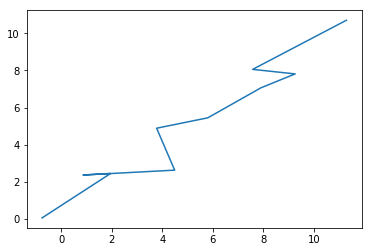

In [51]:
plt.plot(x_data, y_label)

In [52]:
m = tf.Variable(0.44)
b = tf.Variable(0.87)

In [53]:
error = 0
for x, y in zip(x_data, y_label):
    y_hat = m*x + b
    error = error + (y - y_hat)**2

In [54]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate= 0.001)
train = optimizer.minimize(error)

In [55]:
init = tf.global_variables_initializer()

In [57]:
with tf.Session() as sess:
    sess.run(init)
    training_step = 200
    
    for i in range(training_step):
        sess.run(train)
    final_slope, final_intercept = sess.run([m, b])

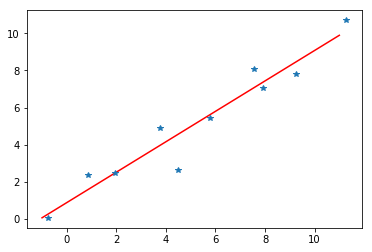

In [60]:
x_test = np.linspace(-1, 11, 10)

y_pred_plot = final_slope*x_test + final_intercept

plt.plot(x_test, y_pred_plot, 'r')
plt.plot(x_data, y_label, '*')